In [2]:
# veri analzizi için gerekli kütüphaneleri ekledim 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [10]:
dataFrame= pd.read_csv("Student_Performance.csv")
dataFrame.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [12]:
dataFrame.describe()
##Veri setinizin hızlı bir istatistiksel özetini almak için kullanılır. "Verilerim hakkında bana kısa ve öz bilgi ver" komutudur.
 # Kaç veri var?
# Ortalama
# Standart sapma
# Minimum değer
# 1. çeyrek
# Medyan (2. çeyrek)
# 3. çeyrek
# Maximum değer
# 1. Temel Bilgiler: Kaç veri var? Eksik veri var mı? (count sayısına bak) Ortalama değerler nedir?
# 2. Dağılım Analizi: Veriler nasıl yayılmış? Aykırı değer (outlier) var mı? min, max, çeyrekliklere bak

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [14]:
#dataFrame.isnull()  burada tabloda null var mı yok mu diye bakılıyor veri null ise true -değilse false
dataFrame.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Using matplotlib backend: module://matplotlib_inline.backend_inline


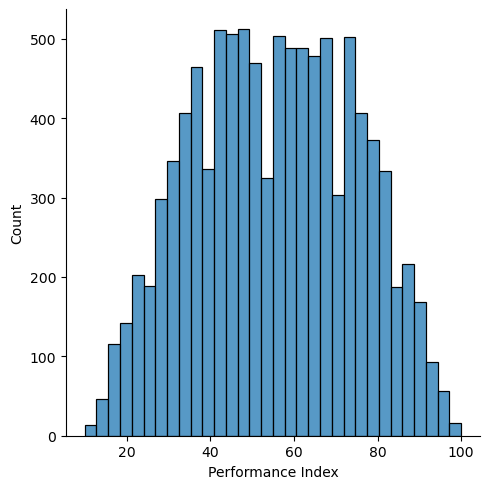

In [15]:
# hangi özellik daha ağir diye bakmak için dataset veya hangisi daha çok etkiliyor analiz yapmak için grafiğe bakiyoruz
%matplotlib
sbn.displot(dataFrame["Performance Index"])

<Axes: ylabel='count'>

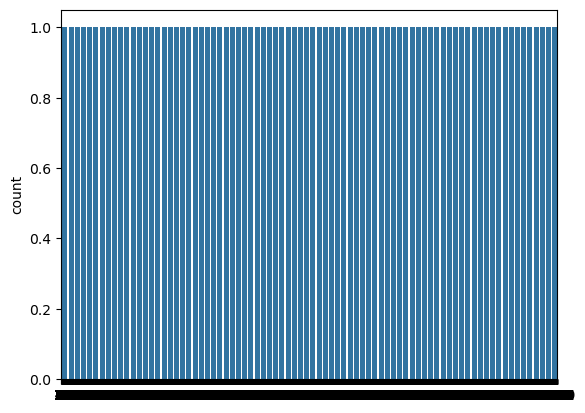

In [17]:
#sbn.countplot(dataFrame["Sleep Hours"])

In [20]:
dataFrame["Extracurricular Activities"]=dataFrame["Extracurricular Activities"].map({'Yes':1,'No':0})

In [21]:
# Sadece sayısal sütunların korelasyonunu al
#thoughtfulness Kısaca .corr() fonksiyonunun amacı, veri setindeki sütunların birbirleriyle ne kadar güçlü bir ilişkiye sahip olduğunu matematiksel olarak ölçmektir.
dataFrame.corr(numeric_only=True)["Performance Index"].sort_values()

Extracurricular Activities          0.024525
Sample Question Papers Practiced    0.043268
Sleep Hours                         0.048106
Hours Studied                       0.373730
Previous Scores                     0.915189
Performance Index                   1.000000
Name: Performance Index, dtype: float64

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

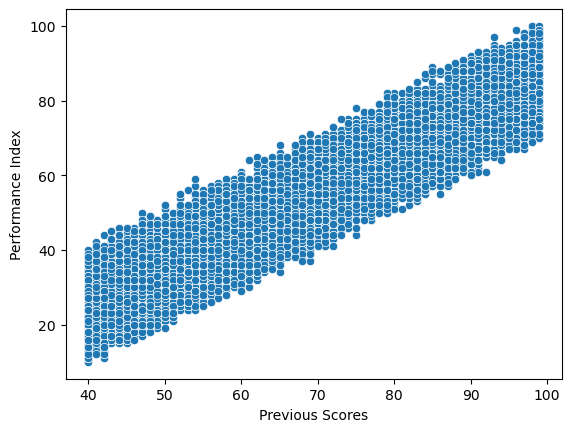

In [30]:
sbn.scatterplot(x="Previous Scores", y="Performance Index" , data=dataFrame)

In [32]:
dataFrame.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [33]:
dataFrame.sort_values("Performance Index",ascending=False).head(20)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
145,9,98,1,7,7,100.0
2725,9,99,1,8,8,100.0
2070,9,98,1,4,5,100.0
2637,9,99,0,9,4,99.0
7348,9,99,1,8,1,99.0
8478,9,96,1,8,9,99.0
1077,9,98,1,9,8,99.0
1157,8,99,1,8,9,99.0
3049,9,99,1,5,7,99.0
2296,8,99,0,9,6,98.0


In [36]:
dataFrame.groupby("Sleep Hours").mean()["Performance Index"]

Sleep Hours
4    53.794935
5    54.801370
6    54.660490
7    55.278043
8    55.932373
9    56.811344
Name: Performance Index, dtype: float64

In [37]:
# burada oğrencilerin uyuma saatlerine göre oğrencilerin performans ortalamalari alındı
# Genelikle hedef değişken (y) ölçeklendirilmez  